In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import statistics
import math
import random
from scipy.stats import chisquare

In [2]:
qrng_binary = pd.read_csv('QRNG_binary.csv')

In [4]:
np.shape(qrng_binary)

(8192000, 1)

In [8]:
qrng_binary.head()

,0
0,1
1,1
2,0
3,0
4,0


In [9]:
qrng_binary_values = qrng_binary.iloc[:,0].values

In [12]:
qrng_binary_values[:15]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [13]:
qubits = np.reshape(qrng_binary_values, (-1,5))

In [14]:
np.shape(qubits)

(1638400, 5)

In [26]:
qubit_1 = qubits[:,0]
qubit_2 = qubits[:,1]
qubit_3 = qubits[:,2]
qubit_4 = qubits[:,3]
qubit_5 = qubits[:,4]

In [28]:
qubit_1_counter = Counter(qubit_1)
qubit_2_counter = Counter(qubit_2)
qubit_3_counter = Counter(qubit_3)
qubit_4_counter = Counter(qubit_4)
qubit_5_counter = Counter(qubit_5)

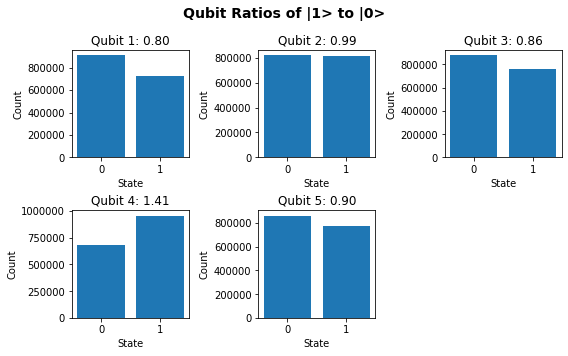

In [66]:
fig,ax = plt.subplots(2,3,figsize = (8,5))
fig.suptitle("Qubit Ratios of |1> to |0>", fontsize = 14, fontweight = "bold")
ax[0,0].bar(qubit_1_counter.keys(), qubit_1_counter.values())
ax[0,0].set_title("Qubit 1: %.2f" %(qubit_1_counter[1] / qubit_1_counter[0]))
ax[0,1].bar(qubit_2_counter.keys(), qubit_2_counter.values())
ax[0,1].set_title("Qubit 2: %.2f" %(qubit_2_counter[1] / qubit_2_counter[0]))
ax[0,2].bar(qubit_3_counter.keys(), qubit_3_counter.values())
ax[0,2].set_title("Qubit 3: %.2f" %(qubit_3_counter[1] / qubit_3_counter[0]))
ax[1,0].bar(qubit_4_counter.keys(), qubit_4_counter.values())
ax[1,0].set_title("Qubit 4: %.2f" %(qubit_4_counter[1] / qubit_4_counter[0]))
ax[1,1].bar(qubit_5_counter.keys(), qubit_5_counter.values())
ax[1,1].set_title("Qubit 5: %.2f" %(qubit_5_counter[1] / qubit_5_counter[0]))

for i in ax.flat:
    i.set(xlabel = "State", ylabel = "Count")

ax[1,2].set_axis_off()
plt.tight_layout()
fig.subplots_adjust(top = 0.86)

In [80]:
qrng_int = []
for i in range(int(len(qrng_binary_values))):
    if i % 8 == 0:
        qrng_int.append(int("".join(str(j) for j in qrng_binary_values[i:i+8]),2))
        
print(len(qrng_int))
print(qrng_int[125])

1024000
76


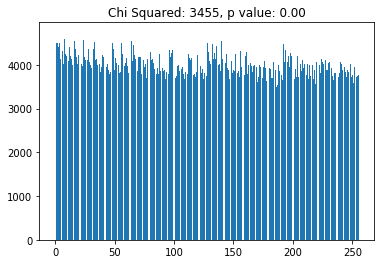

In [94]:
qrng_count = Counter(qrng_int)
(chi, p_value) = chisquare(list(qrng_count.values()))
plt.bar(qrng_count.keys(), qrng_count.values())
plt.title("Chi Squared: %.f, p value: %.2f" %(chi, p_value))
plt.show()

In [86]:
def runsTest(l, l_median): 
  
    runs, n1, n2 = 0, 0, 0
      
    # Checking for start of new run 
    for i in range(len(l)): 
          
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median): 
            runs += 1  
          
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
          
        # no. of negative values 
        else: 
            n2 += 1   
  
    runs_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/ (((n1+n2)**2)*(n1+n2-1))) 
  
    z = (runs-runs_exp)/stan_dev 
  
    return z 
    
Z = abs(runsTest(qrng_int, statistics.median(qrng_int))) 
  
print('Z-statistic= ', Z)

Z-statistic=  0.14503507627660586


In [88]:
from statsmodels.sandbox.stats.runs import runstest_1samp

runstest_1samp(qrng_int, correction = False)

(0.21770724208617537, 0.8276572206524165)

In [89]:
qrng_int

[194,
 253,
 194,
 138,
 186,
 182,
 166,
 3,
 245,
 187,
 146,
 223,
 159,
 185,
 218,
 149,
 111,
 199,
 91,
 198,
 104,
 115,
 222,
 153,
 238,
 0,
 161,
 139,
 79,
 75,
 92,
 31,
 75,
 251,
 11,
 247,
 189,
 30,
 31,
 16,
 132,
 245,
 164,
 101,
 40,
 187,
 151,
 133,
 128,
 175,
 122,
 151,
 46,
 204,
 131,
 114,
 214,
 136,
 71,
 162,
 87,
 228,
 202,
 96,
 68,
 0,
 196,
 167,
 172,
 15,
 139,
 146,
 187,
 215,
 10,
 82,
 143,
 224,
 18,
 199,
 107,
 205,
 182,
 193,
 62,
 25,
 243,
 215,
 3,
 224,
 34,
 67,
 226,
 189,
 123,
 62,
 152,
 177,
 32,
 162,
 87,
 131,
 228,
 15,
 229,
 163,
 28,
 5,
 251,
 78,
 205,
 173,
 118,
 249,
 220,
 161,
 243,
 238,
 231,
 210,
 29,
 142,
 87,
 72,
 254,
 76,
 183,
 232,
 223,
 38,
 30,
 178,
 5,
 251,
 237,
 177,
 4,
 9,
 217,
 146,
 114,
 100,
 222,
 137,
 46,
 42,
 35,
 37,
 158,
 6,
 32,
 191,
 83,
 243,
 186,
 34,
 67,
 7,
 88,
 214,
 142,
 128,
 0,
 71,
 204,
 236,
 255,
 204,
 222,
 107,
 7,
 184,
 236,
 45,
 228,
 226,
 150,
 117,
 8,

In [90]:
np.median(qrng_int)

125.0

In [114]:
qrng_2_int = []
for i in range(int(len(qubit_2))):
    if i % 8 == 0:
        qrng_2_int.append(int("".join(str(j) for j in qubit_2[i:i+8]),2))
        
print(len(qrng_2_int))
print(qrng_2_int[125])

204800
21


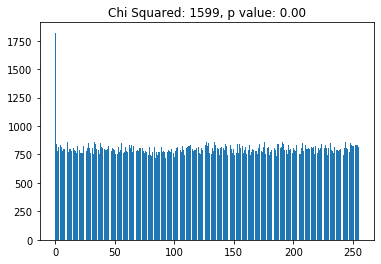

In [115]:
qrng_2_count = Counter(qrng_2_int)
(chi, p_value) = chisquare(list(qrng_2_count.values()))
plt.bar(qrng_2_count.keys(), qrng_2_count.values())
plt.title("Chi Squared: %.f, p value: %.2f" %(chi, p_value))
plt.show()

In [111]:
type(qrng_2_int[4])

int

In [120]:
def create_integers(binary_string):
    qubit_integers = []
    for i in range(int(len(binary_string))):
        if i % 8 == 0:
            qubit_integers.append(int("".join(str(j) for j in binary_string[i:i+8]),2))
    return qubit_integers

In [139]:
qubit_1_int = create_integers(qubit_1)
qubit_2_int = create_integers(qubit_2)
qubit_3_int = create_integers(qubit_3)
qubit_4_int = create_integers(qubit_4)
qubit_5_int = create_integers(qubit_5)

In [127]:
qubit_1_counter = Counter(qubit_1_int)
(chi_1, chi_p_value_1) = chisquare(list(qubit_1_counter.values()))
runs_1, runs_p_1 = runstest_1samp(qubit_1_int, correction = False)

qubit_2_counter = Counter(qubit_2_int)
(chi_2, chi_p_value_2) = chisquare(list(qubit_2_counter.values()))
runs_2, runs_p_2 = runstest_1samp(qubit_2_int, correction = False)

qubit_3_counter = Counter(qubit_3_int)
(chi_3, chi_p_value_3) = chisquare(list(qubit_3_counter.values()))
runs_3, runs_p_3 = runstest_1samp(qubit_3_int, correction = False)

qubit_4_counter = Counter(qubit_4_int)
(chi_4, chi_p_value_4) = chisquare(list(qubit_4_counter.values()))
runs_4, runs_p_4 = runstest_1samp(qubit_4_int, correction = False)

qubit_5_counter = Counter(qubit_5_int)
(chi_5, chi_p_value_5) = chisquare(list(qubit_5_counter.values()))
runs_5, runs_p_5 = runstest_1samp(qubit_5_int, correction = False)

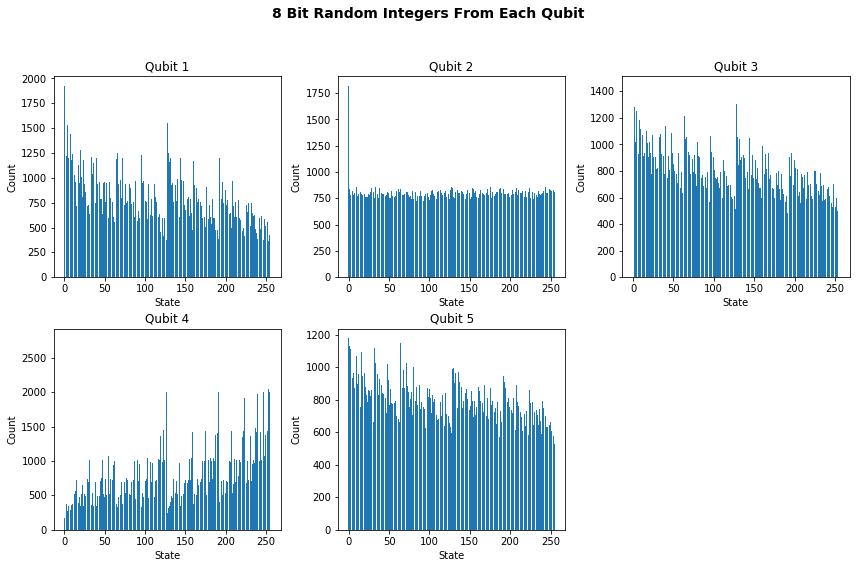

In [128]:
fig,ax = plt.subplots(2,3,figsize = (12,8))
fig.suptitle("8 Bit Random Integers From Each Qubit", fontsize = 14, fontweight = "bold")
ax[0,0].bar(qubit_1_counter.keys(), qubit_1_counter.values())
ax[0,0].set_title("Qubit 1")
ax[0,1].bar(qubit_2_counter.keys(), qubit_2_counter.values())
ax[0,1].set_title("Qubit 2")
ax[0,2].bar(qubit_3_counter.keys(), qubit_3_counter.values())
ax[0,2].set_title("Qubit 3")
ax[1,0].bar(qubit_4_counter.keys(), qubit_4_counter.values())
ax[1,0].set_title("Qubit 4")
ax[1,1].bar(qubit_5_counter.keys(), qubit_5_counter.values())
ax[1,1].set_title("Qubit 5")

for i in ax.flat:
    i.set(xlabel = "State", ylabel = "Count")

ax[1,2].set_axis_off()
plt.tight_layout()
fig.subplots_adjust(top = 0.86)

In [141]:
qubit_2_ex0 = [x for x in qubit_2_int if x != 0]

In [142]:
len(qubit_2_ex0)

202980

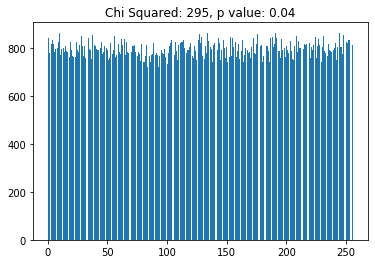

In [148]:
qubit_2ex0_count = Counter(qubit_2_ex0)
(chi, p_value) = chisquare(list(qubit_2ex0_count.values()))
plt.bar(qubit_2ex0_count.keys(), qubit_2ex0_count.values())
plt.title("Chi Squared: %.f, p value: %.2f" %(chi, p_value))
plt.show()

In [149]:
Z = abs(runsTest(qubit_2_ex0, statistics.median(qubit_2_ex0)))
  
print('Z-statistic= ', Z)

Z-statistic=  1.2118833963464168


In [152]:
runstest_1samp(qubit_2_ex0, correction = False)

(-1.2118833963464168, 0.2255570187415169)